In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing

In [8]:
data = pd.read_csv( "lalonde.csv")
data['group'] = data['id'].map(lambda x : x[0:3] if(x[0:3] == 'NSW' ) else x[0:4]) 


data_NSW = data[data['treat'] == 1]
data_PSID = data[data['treat'] == 0]
data.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,group
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,NSW
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,NSW
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,NSW
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,NSW
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,NSW


In [9]:
data.groupby('group').mean()['re78']

group
NSW     6349.143530
PSID    6984.169742
Name: re78, dtype: float64

In [10]:
data.groupby('group').median()['re78']

group
NSW     4232.309
PSID    4975.505
Name: re78, dtype: float64

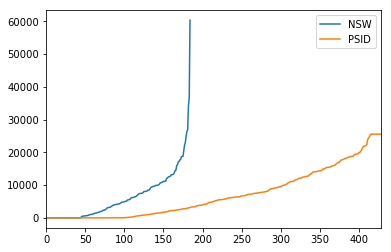

In [11]:
plt.figure(100).clear()


data_NSW_val= data_NSW['re78'].sort_values()
data_NSW_val.index = range(data_NSW_val.size)

data_PSID_val= data_PSID['re78'].sort_values()
data_PSID_val.index = range(data_PSID_val.size)


fuse_Data_re78 = pd.DataFrame(data = {'NSW':data_NSW_val , 'PSID' : data_PSID_val})
fuse_Data_re78.plot (  kind = 'line' , legend = True).figure

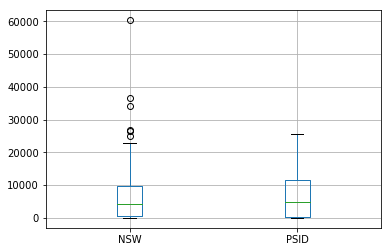

In [14]:
plt.figure(101).clear()
fuse_Data_re78.plot (  kind = 'box' , grid = True).figure

In [15]:
plt.close('all')

In [16]:
data_NSW[['treat' , 'age', 'educ' , 'black' , 'hispan' , 'married' , 'nodegree']].mean()

treat        1.000000
age         25.816216
educ        10.345946
black        0.843243
hispan       0.059459
married      0.189189
nodegree     0.708108
dtype: float64

In [17]:
data_PSID[['treat' , 'age', 'educ' , 'black' , 'hispan' , 'married' , 'nodegree']].mean()

treat        0.000000
age         28.030303
educ        10.235431
black        0.202797
hispan       0.142191
married      0.512821
nodegree     0.596737
dtype: float64

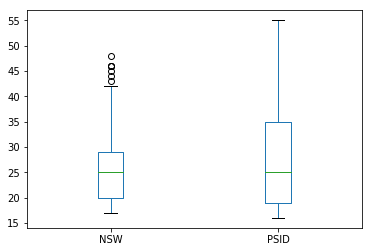

In [18]:
plt.figure(102).clear()


data_NSW_age= data_NSW['age'].sort_values()
data_NSW_age.index = range(data_NSW_age.size)

data_PSID_age= data_PSID['age'].sort_values()
data_PSID_age.index = range(data_PSID_age.size)


fuse_data_age = pd.DataFrame(data = {'NSW':data_NSW_age , 'PSID' : data_PSID_age})
fuse_data_age.plot (  kind = 'box').figure



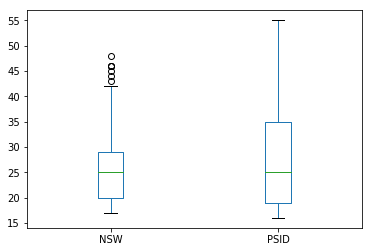

In [20]:
plt.figure(102).clear()


data_NSW_educ= data_NSW['educ'].sort_values()
data_NSW_educ.index = range(data_NSW_educ.size)

data_PSID_age= data_PSID['educ'].sort_values()
data_PSID_age.index = range(data_PSID_age.size)


fuse_data_educ = pd.DataFrame(data = {'NSW':data_NSW_educ , 'PSID' : data_PSID_age})
fuse_data_age.plot (  kind = 'box').figure

In [29]:
logistic_regressor = linear_model.LogisticRegression()

#we cast the re78 as int column because the logistic regressor cannot make a regression on continuous values 
logistic_regressor.fit(data[['treat' , 'age', 'educ' , 'black' , 'hispan' , 'married' , 'nodegree']].values,\
                      data['re78'].values.astype('int'))



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)